In [53]:
## This notebook will document the processing procedures for the Johnston Lab retinal organoid data

!cat ../sample_spec/days.txt 

0
0
0
111
111
111
128
128
128
158
158
173
173
173
181
181
181
35
35
35
380
380
380
69
69
69
10
10
10
200
200
200
20
20
250
250
250
303
303
303
329
329


In [7]:
# Imports:

import numpy as np
import matplotlib.pyplot as plt

In [77]:
# The samples we have received so far:

samples = ["H7_D450_R1_S1_R1_001.fastq",
"H7_D450_R2_S2_R1_001.fastq",
"H7_iCas9_D414_R1_S3_R1_001.fastq",
"H7_iCas9_D414_R2_S4_R1_001.fastq",
"H7-iCas9-DBD-R1_S1_R1_001.fastq",
"H7-iCas9-DBD-R2_S2_R1_001.fastq",
"H7-iCas9-DBD-R3_S3_R1_001.fastq",
"H7-iCas9-DBD-T3-R1_S4_R1_001.fastq",
"H7-iCas9-DBD-T3-R2_S5_R1_001.fastq",
"H7-iCas9-DBD-T3-R3_S6_R1_001.fastq",
"H7-iCas9-T3-R1_S2_R1_001.fastq",
"H7-iCas9-T3-R2_S3_R1_001.fastq",
"H7-iCas9-WT-R1_S1_R1_001.fastq",
"KEld-111_1_S7_R1_001.fastq",
"KEld-111_2_S8_R1_001.fastq",
"KEld-111_3_S9_R1_001.fastq",
"KEld-128_1_S10_R1_001.fastq",
"KEld-128_2_S11_R1_001.fastq",
"KEld-128_3_S12_R1_001.fastq",
"KEld-158_1_S1_R1_001.fastq",
"KEld-158_2_S2_R1_001.fastq",
"KEld-173_1_S3_R1_001.fastq",
"KEld-173_2_S4_R1_001.fastq",
"KEld-173_3_S5_R1_001.fastq",
"KEld-181_1_S6_R1_001.fastq",
"KEld-181_2_S7_R1_001.fastq",
"KEld-181_3_S8_R1_001.fastq",
"KEld-35_1_S1_R1_001.fastq",
"KEld-35_2_S2_R1_001.fastq",
"KEld-35_3_S3_R1_001.fastq",
"KEld-380_1_S9_R1_001.fastq",
"KEld-380_2_S10_R1_001.fastq",
"KEld-380_3_S11_R1_001.fastq",
"KEld-69_1_S4_R1_001.fastq",
"KEld-69_2_S5_R1_001.fastq",
"KEld-69_3_S6_R1_001.fastq",
"Keld-D10_1_S1_R1_001.fastq",
"Keld-D10_2_S2_R1_001.fastq",
"Keld-D10_3_S3_R1_001.fastq",
"KEld-D200_1_S1_R1_001.fastq",
"KEld-D200_2_S2_R1_001.fastq",
"KEld-D200_3_S3_R1_001.fastq",
"Keld-D20_1_S4_R1_001.fastq",
"Keld-D20_2_S5_R1_001.fastq",
"Keld-D250_1_S6_R1_001.fastq",
"Keld-D250_2_S7_R1_001.fastq",
"Keld-D250_3_S8_R1_001.fastq",
"KEld-D303_1_S4_R1_001.fastq",
"KEld-D303_2_S5_R1_001.fastq",
"KEld-D303_3_S6_R1_001.fastq",
"KEld-R1_S1_R1_001.fastq",
"KEld-R2_S2_R1_001.fastq",
"KEld-R3_S3_R1_001.fastq",
"SHad-D329_R1_S1_R1_001.fastq",
"SHad-D329_R2_S2_R1_001.fastq",
"SHad-H7RA_On_R1_S1_R1_001.fastq",
"SHad-H7RA_On_R2_S2_R1_001.fastq",
"SHad-H7RA_On_R3_S3_R1_001.fastq",
"THRB_KO_D414_R1_S5_R1_001.fastq",
"THRB_KO_D414_R2_S6_R1_001.fastq"]

sample_days = [
    450,
    450,
    414,
    414,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    111,
    111,
    111,
    128,
    128,
    128,
    158,
    158,
    173,
    173,
    173,
    181,
    181,
    181,
    35,
    35,
    35,
    380,
    380,
    380,
    69,
    69,
    69,
    10,
    10,
    10,
    200,
    200,
    200,
    20,
    20,
    250,
    250,
    250,
    303,
    303,
    303,
    0,
    0,
    0,
    329,
    329,
    0,
    0,
    0,
    414,
    414,

]

print(list(zip(samples,sample_days)))
# weri_samples = !ls ../../raw_data/weri/*.fastq
# print(weri_samples)

# human_embryonic_samples = !ls ../../raw_data/human_embryonic/*.fastq
# print(human_embryonic_samples)

[('H7_D450_R1_S1_R1_001.fastq', 450), ('H7_D450_R2_S2_R1_001.fastq', 450), ('H7_iCas9_D414_R1_S3_R1_001.fastq', 414), ('H7_iCas9_D414_R2_S4_R1_001.fastq', 414), ('H7-iCas9-DBD-R1_S1_R1_001.fastq', 0), ('H7-iCas9-DBD-R2_S2_R1_001.fastq', 0), ('H7-iCas9-DBD-R3_S3_R1_001.fastq', 0), ('H7-iCas9-DBD-T3-R1_S4_R1_001.fastq', 0), ('H7-iCas9-DBD-T3-R2_S5_R1_001.fastq', 0), ('H7-iCas9-DBD-T3-R3_S6_R1_001.fastq', 0), ('H7-iCas9-T3-R1_S2_R1_001.fastq', 0), ('H7-iCas9-T3-R2_S3_R1_001.fastq', 0), ('H7-iCas9-WT-R1_S1_R1_001.fastq', 0), ('KEld-111_1_S7_R1_001.fastq', 111), ('KEld-111_2_S8_R1_001.fastq', 111), ('KEld-111_3_S9_R1_001.fastq', 111), ('KEld-128_1_S10_R1_001.fastq', 128), ('KEld-128_2_S11_R1_001.fastq', 128), ('KEld-128_3_S12_R1_001.fastq', 128), ('KEld-158_1_S1_R1_001.fastq', 158), ('KEld-158_2_S2_R1_001.fastq', 158), ('KEld-173_1_S3_R1_001.fastq', 173), ('KEld-173_2_S4_R1_001.fastq', 173), ('KEld-173_3_S5_R1_001.fastq', 173), ('KEld-181_1_S6_R1_001.fastq', 181), ('KEld-181_2_S7_R1_001.fas

In [71]:
# Processing .pile files and plotting output:

def load_pile(location):
    raw_table = np.loadtxt(location,dtype=str)
    
    # If the pileup contains only one line loadtxt will interpret it as a 1 dim array,
    # we correct here
    if len(raw_table.shape) < 2:
        raw_table = np.array([raw_table,])

    # We need to check that the pileup isn't empty, which happens if there are no alignments
    # to the locations in question
    if raw_table.shape[0] > 1:
        pile = {}
        pile = {
            'location_names' : raw_table[:,0],
            'positions' : raw_table[:,1].astype(dtype=int),
            'base_in_reference' : raw_table[:,2],
            'pileup' : raw_table[:,3].astype(dtype=int),
        }
        return pile
    # Else we return a pileup that is empty
    else:
        pile = {
            'location_names' : np.zeros((0,0)).astype(dtype=str),
            'positions' : np.zeros((0,0)).astype(dtype=int),
            'base_in_reference' : np.zeros((0,0)).astype(dtype=str),
            'pileup' : np.zeros((0,0)).astype(dtype=int),
        }
        return pile
    

sample_piles = [load_pile('../../quantification/basic_4/' + s + '.pile') for s in samples]
sample_piles

/home/bbrener1/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: loadtxt: Empty input file: "../../quantification/basic_4/H7-iCas9-DBD-R1_S1_R1_001.fastq.pile"
  after removing the cwd from sys.path.
/home/bbrener1/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: loadtxt: Empty input file: "../../quantification/basic_4/H7-iCas9-DBD-R2_S2_R1_001.fastq.pile"
  after removing the cwd from sys.path.
/home/bbrener1/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: loadtxt: Empty input file: "../../quantification/basic_4/H7-iCas9-DBD-R3_S3_R1_001.fastq.pile"
  after removing the cwd from sys.path.
/home/bbrener1/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: loadtxt: Empty input file: "../../quantification/basic_4/H7-iCas9-DBD-T3-R1_S4_R1_001.fastq.pile"
  after removing the cwd from sys.path.
/home/bbrener1/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarnin

[{'location_names': array(['ENST00000595290.5|ENSG00000268221.5|OTTHUMG00000022652.8|OTTHUMT00000058771.5|OPN1MW-201|OPN1MW|1242|protein_coding|',
         'ENST00000595290.5|ENSG00000268221.5|OTTHUMG00000022652.8|OTTHUMT00000058771.5|OPN1MW-201|OPN1MW|1242|protein_coding|',
         'ENST00000595290.5|ENSG00000268221.5|OTTHUMG00000022652.8|OTTHUMT00000058771.5|OPN1MW-201|OPN1MW|1242|protein_coding|',
         'ENST00000595290.5|ENSG00000268221.5|OTTHUMG00000022652.8|OTTHUMT00000058771.5|OPN1MW-201|OPN1MW|1242|protein_coding|',
         'ENST00000595290.5|ENSG00000268221.5|OTTHUMG00000022652.8|OTTHUMT00000058771.5|OPN1MW-201|OPN1MW|1242|protein_coding|',
         'ENST00000595290.5|ENSG00000268221.5|OTTHUMG00000022652.8|OTTHUMT00000058771.5|OPN1MW-201|OPN1MW|1242|protein_coding|',
         'ENST00000595290.5|ENSG00000268221.5|OTTHUMG00000022652.8|OTTHUMT00000058771.5|OPN1MW-201|OPN1MW|1242|protein_coding|',
         'ENST00000595290.5|ENSG00000268221.5|OTTHUMG00000022652.8|OTTHUMT00000

In [78]:
unique_locations = set()
for pile in sample_piles:
    for l,p in zip(pile['location_names'],pile['positions']):
        unique_locations.add((l,p))

unique_locations = list(unique_locations)
unique_locations = sorted(unique_locations)
unique_locations = {ul:i for i,ul in enumerate(unique_locations)}

print(unique_locations)
        
sample_order = np.argsort(sample_days)
plot_table = np.zeros((len(samples),len(unique_locations)))

for i,sample_index in enumerate(sample_order):
    sample_pile = sample_piles[sample_index]
    for l,p,n in zip(sample_pile['location_names'],sample_pile['positions'],sample_pile['pileup']):
        ul_index = unique_locations[(l,p)]
        plot_table[i,ul_index] = n
        


{('ENST00000369951.8|ENSG00000102076.9|OTTHUMG00000034295.6|OTTHUMT00000082839.3|OPN1LW-201|OPN1LW|1261|protein_coding|', 254): 0, ('ENST00000369951.8|ENSG00000102076.9|OTTHUMG00000034295.6|OTTHUMT00000082839.3|OPN1LW-201|OPN1LW|1261|protein_coding|', 360): 1, ('ENST00000369951.8|ENSG00000102076.9|OTTHUMG00000034295.6|OTTHUMT00000082839.3|OPN1LW-201|OPN1LW|1261|protein_coding|', 391): 2, ('ENST00000369951.8|ENSG00000102076.9|OTTHUMG00000034295.6|OTTHUMT00000082839.3|OPN1LW-201|OPN1LW|1261|protein_coding|', 407): 3, ('ENST00000369951.8|ENSG00000102076.9|OTTHUMG00000034295.6|OTTHUMT00000082839.3|OPN1LW-201|OPN1LW|1261|protein_coding|', 749): 4, ('ENST00000369951.8|ENSG00000102076.9|OTTHUMG00000034295.6|OTTHUMT00000082839.3|OPN1LW-201|OPN1LW|1261|protein_coding|', 757): 5, ('ENST00000369951.8|ENSG00000102076.9|OTTHUMG00000034295.6|OTTHUMT00000082839.3|OPN1LW-201|OPN1LW|1261|protein_coding|', 758): 6, ('ENST00000369951.8|ENSG00000102076.9|OTTHUMG00000034295.6|OTTHUMT00000082839.3|OPN1LW-20

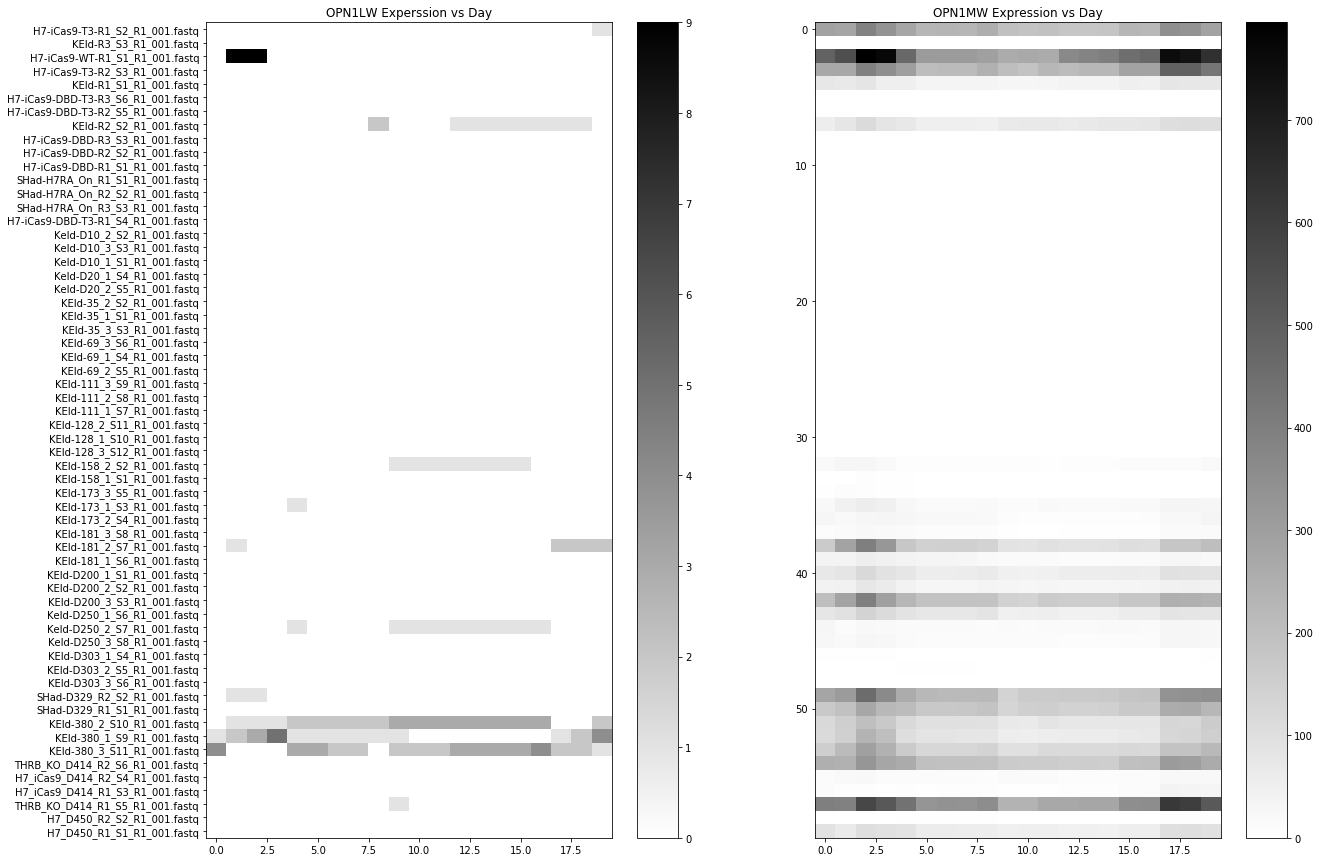

In [95]:
fig = plt.figure(figsize=(20,15))

plt.subplot(121)
plt.title("OPN1LW Experssion vs Day")
plt.imshow(plot_table[:,:20],aspect='auto',cmap='binary')
plt.colorbar()
plt.yticks(np.arange(len(samples)),labels=np.array(samples)[sample_order])
plt.subplot(122)
plt.title("OPN1MW Expression vs Day")
plt.imshow(plot_table[:,20:],aspect='auto',cmap='binary')
plt.colorbar()
plt.show()

In [76]:
print(len(sample_order))

61
